## 필수과제1
- 정규분포와 비슷한 컬럼을 추가하여 
- 기존 데이터 df casual, cnt ,[정규분포와 비슷한 추가컬럼] 을 통해서 - r2, rmse, 확인해 주세요.
- 정규분포와 비슷하지 않은 컬럼 추가하여
- 기존 데이터 df casual, cnt ,[정규분포와 비슷하지 않은 추가컬럼] 을 통해서 - r2, rmse, 확인해 주세요.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/bike_sharing_daily.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 분포 확인(distplot)

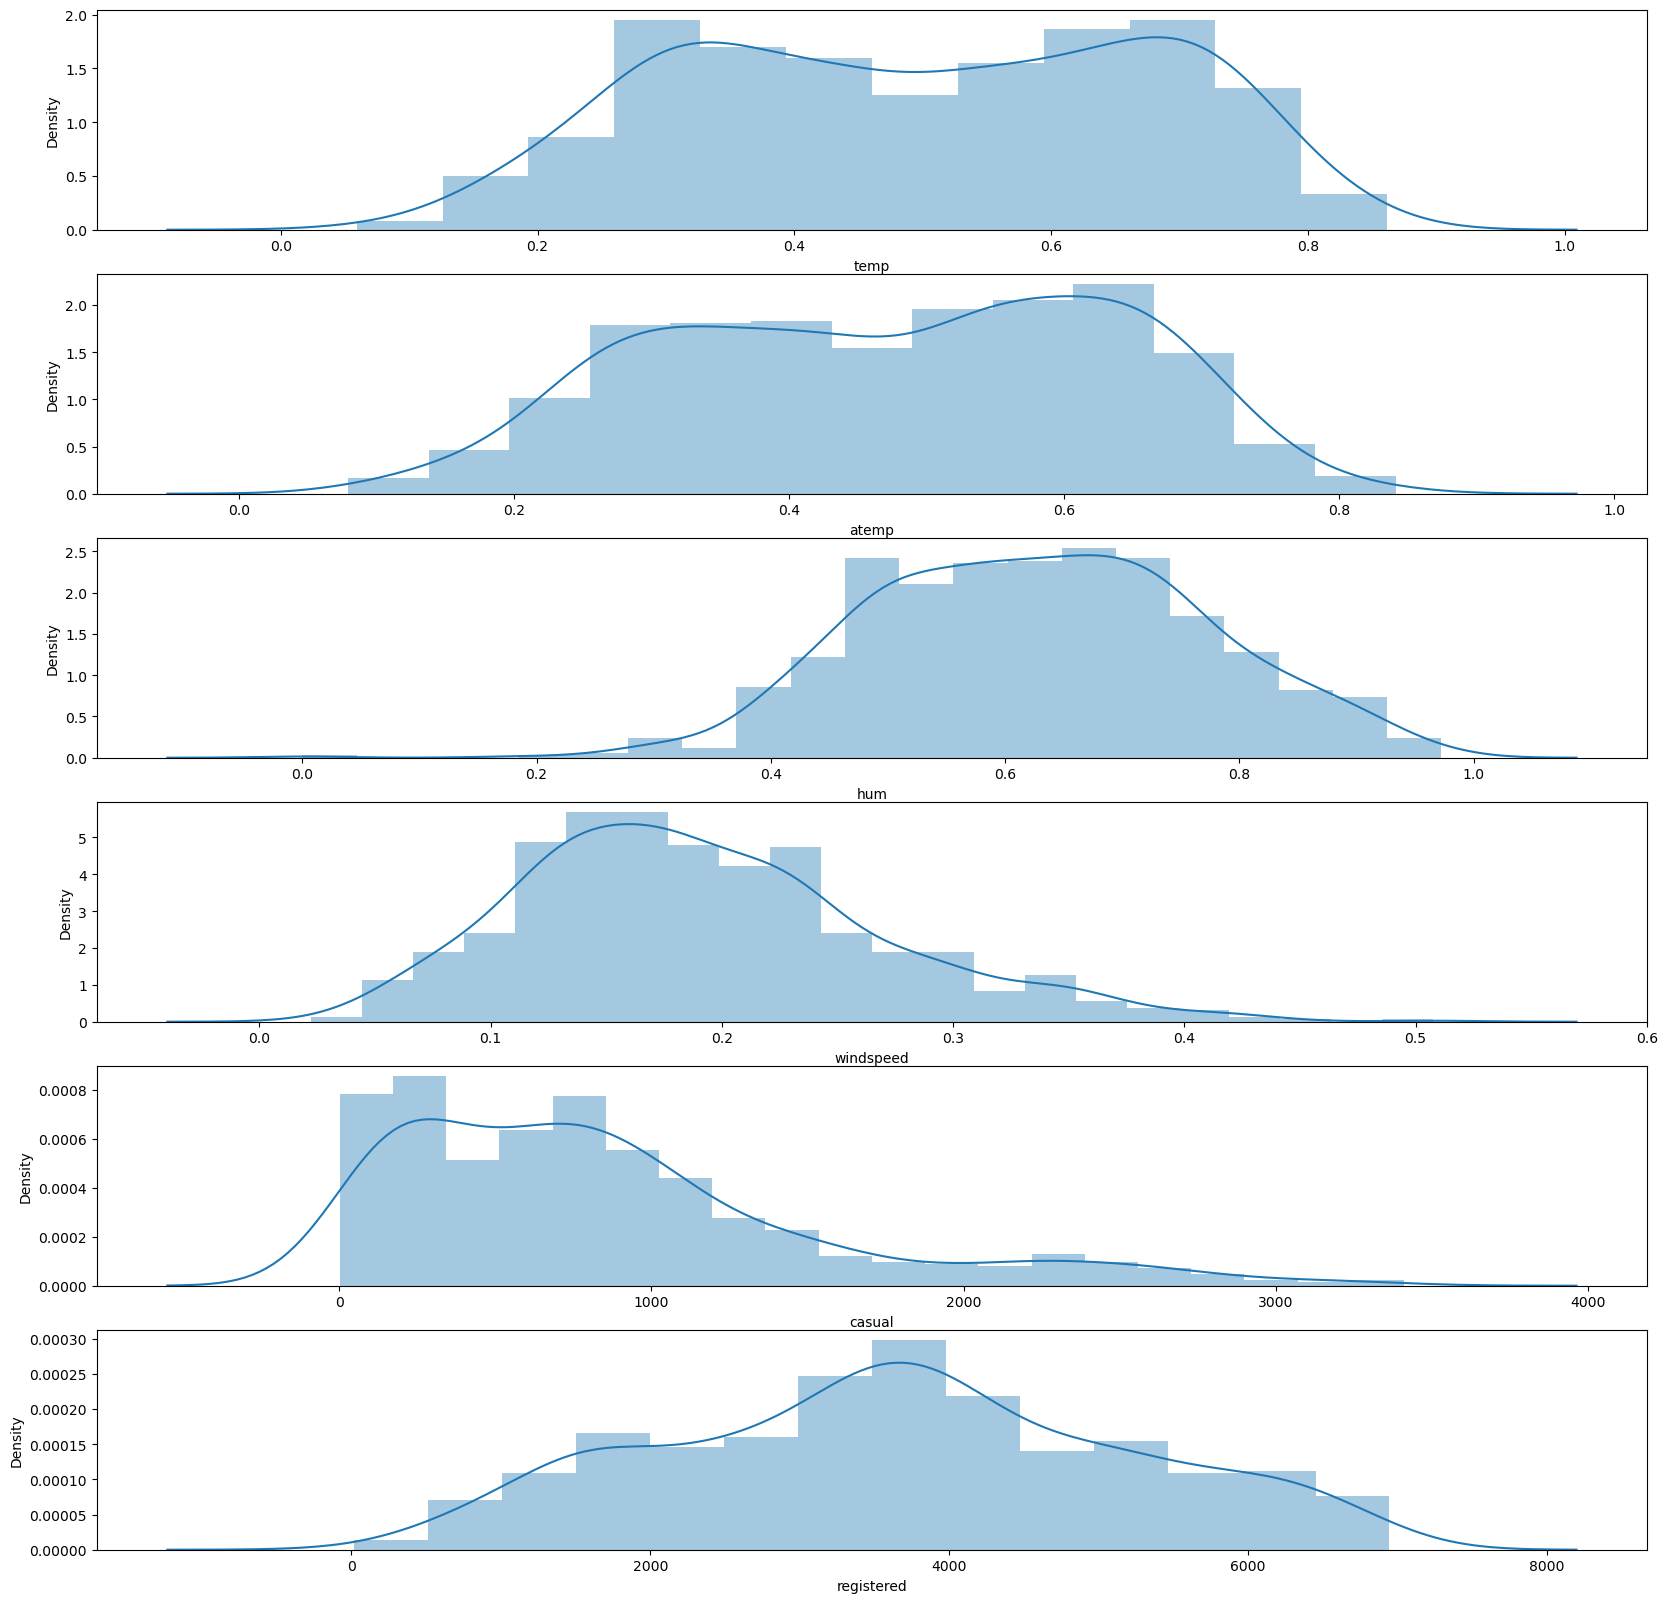

In [5]:
cols = ['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']

fig, axs = plt.subplots(nrows = len(cols) , figsize = (20,20))
for i,col in enumerate(cols):
    sns.distplot(df[col], ax = axs[i])

# registered 정규분포에 가까워보임
# hum,windspeed,casual은 분포가 한쪽으로 치우쳐져 있음

### Shapiro

In [6]:
df_bs = df.dropna()

In [7]:
# shapiro 검정
from scipy.stats import shapiro
import numpy as np

for col in cols:
    stat, p = shapiro(df_bs[col])
    alpha = 0.05
    print(col , 'shapiro test result:')
    if p > alpha:
        print('Fail to reject H0')
    else:
        print('reject H0') # 귀무가설 기각 - 정규성을 따르지 않음
    print('------------------')

temp shapiro test result:
reject H0
------------------
atemp shapiro test result:
reject H0
------------------
hum shapiro test result:
reject H0
------------------
windspeed shapiro test result:
reject H0
------------------
casual shapiro test result:
reject H0
------------------
registered shapiro test result:
reject H0
------------------


### Model 결과 확인
- 기존 데이터 cnt, casual, 정규분포와 유사한 컬럼 추가 후 rmse 확인

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 선형회귀
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
df_X = np.array(df_bs['casual']).reshape(-1, 1)  # casual
y = df_bs['cnt']  # 종속 변수 선택

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs['cnt'], test_size=0.3, random_state=111)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [11]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('model :',rmse)

model : 1389.867711745627


- 정규분포와 유사한 컬럼 추가 후 모델 성능 확인

In [12]:
# 데이터 준비
df_X = np.array(df_bs[['casual', 'registered']]).reshape(-1, 2)  # casual 및 registered 열 선택
y = df_bs['cnt']  # 종속 변수 선택

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs['cnt'], test_size=0.3, random_state=111)

In [13]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [14]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('model1 :',rmse)

model1 : 3.5267025006432875


정규분포에 가까운 컬럼을 추가한 후, 모델 성능이 개선되었다(1389 > 3.52)

- 정규분포와 유사하지 않은 컬럼 추가 후 모델 성능 확인

In [15]:
# 데이터 준비
df_X = np.array(df_bs[['casual', 'windspeed']]).reshape(-1, 2)  # casual 및 registered 열 선택
y = df_bs['cnt']  # 종속 변수 선택

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs['cnt'], test_size=0.3, random_state=111)

In [16]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [17]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('model2 :',rmse)

model2 : 1393.0310307604834


정규분포와 유사하지 않은 컬럼 추가 후 성능이 더 안좋아짐